## AQ2 : Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

- Each piece of the cut should have an integer length
- He should at least cut the ribbon once
- The multiplication of the length of all the pieces be the maximum possible


In [142]:
#TODO demonstration of AQ2.2

## AQ2.1: Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [120]:
import math
from typing import Counter

def findmax(n):              
    max = c([], 1, n)                       #1
    return max                              #1

def c(arr,i,n):
    global counter
    global m
    if (n==0) and len(arr)>1:               #1
        product = math.prod(arr)            #len(arr) ---> (at most N)
        if product > m:                     #1
            m = product                     #1
    for j in range(i, n+1):                 #N
        counter+=1
        arr.append(j)                       #1
        c(arr, j, n-j)                      #1
        arr.pop()                           #1
    return m                                #1
    

In [128]:
counter = 0
m = 0
findmax(5)

6

## AQ2.2: Show that the algorithm has exponential running time

To show that the algorithm above has an exponential running time, we will do a demonstration but first we will plot the counters for the recursive part of the algorithm related to the value of n.

We did an example with n going from 1 to 50 

In [137]:
arr = []
for n in range(1, 50):
    counter = 0
    m = 0
    arr.append(findmax(n))
    #print("counter for ", n, ": ", counter)

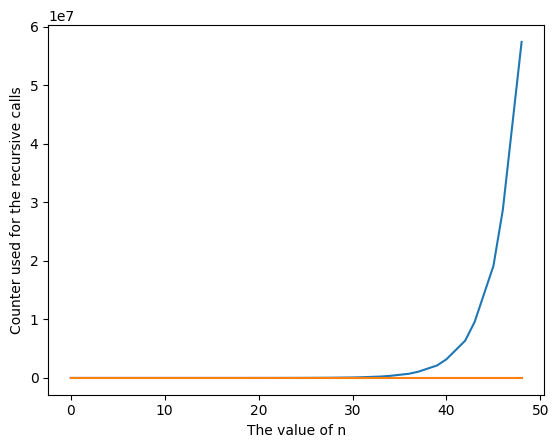

In [140]:
import matplotlib.pyplot as plt
plt.plot(arr)
plt.plot(range(1,50))
plt.xlabel("The value of n")
plt.ylabel("Counter used for the recursive calls")
plt.show()

## AQ2.3: Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.